<a href="https://colab.research.google.com/github/rachanakafle/Assignment_Management_System/blob/master/Prophet_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
files.upload()


Saving COVID_data.csv to COVID_data.csv


{'COVID_data.csv': b'Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases\r\n1/3/2020,DE,Germany,EURO,0,0\r\n1/4/2020,DE,Germany,EURO,1,1\r\n1/5/2020,DE,Germany,EURO,0,1\r\n1/6/2020,DE,Germany,EURO,0,1\r\n1/7/2020,DE,Germany,EURO,0,1\r\n1/8/2020,DE,Germany,EURO,0,1\r\n1/9/2020,DE,Germany,EURO,0,1\r\n1/10/2020,DE,Germany,EURO,0,1\r\n1/11/2020,DE,Germany,EURO,0,1\r\n1/12/2020,DE,Germany,EURO,0,1\r\n1/13/2020,DE,Germany,EURO,0,1\r\n1/14/2020,DE,Germany,EURO,0,1\r\n1/15/2020,DE,Germany,EURO,0,1\r\n1/16/2020,DE,Germany,EURO,0,1\r\n1/17/2020,DE,Germany,EURO,0,1\r\n1/18/2020,DE,Germany,EURO,0,1\r\n1/19/2020,DE,Germany,EURO,0,1\r\n1/20/2020,DE,Germany,EURO,0,1\r\n1/21/2020,DE,Germany,EURO,0,1\r\n1/22/2020,DE,Germany,EURO,0,1\r\n1/23/2020,DE,Germany,EURO,0,1\r\n1/24/2020,DE,Germany,EURO,1,2\r\n1/25/2020,DE,Germany,EURO,0,2\r\n1/26/2020,DE,Germany,EURO,0,2\r\n1/27/2020,DE,Germany,EURO,0,2\r\n1/28/2020,DE,Germany,EURO,0,2\r\n1/29/2020,DE,Germany,EURO,2,4\r\n1/30/2020,DE,German

In [ ]:
df = pd.read_csv("COVID_data.csv") 
df.head(10)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases
0,1/3/2020,DE,Germany,EURO,0,0
1,1/4/2020,DE,Germany,EURO,1,1
2,1/5/2020,DE,Germany,EURO,0,1
3,1/6/2020,DE,Germany,EURO,0,1
4,1/7/2020,DE,Germany,EURO,0,1
5,1/8/2020,DE,Germany,EURO,0,1
6,1/9/2020,DE,Germany,EURO,0,1
7,1/10/2020,DE,Germany,EURO,0,1
8,1/11/2020,DE,Germany,EURO,0,1
9,1/12/2020,DE,Germany,EURO,0,1


In [ ]:
df.shape

(3189, 6)

# Data preprocessing

In [ ]:
# count NAN values
count_nan = df.isna().sum()
print(count_nan)

Date_reported       0
Country_code        0
Country             0
WHO_region          0
New_cases           0
Cumulative_cases    0
dtype: int64


In [ ]:
# calculate duplicates
dups = df.duplicated()
# report if there any duplicates
print(dups.any())
# list all duplicate rows
print(df[dups])

False
Empty DataFrame
Columns: [Date_reported, Country_code, Country, WHO_region, New_cases, Cumulative_cases]
Index: []


# Data Analysis and Visulaization

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3189 entries, 0 to 3188
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date_reported     3189 non-null   object
 1   Country_code      3189 non-null   object
 2   Country           3189 non-null   object
 3   WHO_region        3189 non-null   object
 4   New_cases         3189 non-null   int64 
 5   Cumulative_cases  3189 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 149.6+ KB


In [ ]:
# change timestamp data types string to datetime
df['Date_reported'] = pd. to_datetime(df['Date_reported'], format = '%m/%d/%Y')

In [ ]:
# check data types
df.dtypes

Date_reported       datetime64[ns]
Country_code                object
Country                     object
WHO_region                  object
New_cases                    int64
Cumulative_cases             int64
dtype: object

In [ ]:
df.describe()

,New_cases,Cumulative_cases
count,3.189000e+03,3.189000e+03
mean,5.596279e+04,2.439860e+07
std,9.388109e+04,2.622718e+07
min,-7.490000e+02,0.000000e+00
25%,4.912000e+03,2.299754e+06
50%,2.395000e+04,1.454391e+07
75%,6.561000e+04,3.639062e+07
max,1.265520e+06,9.732949e+07


[Text(0.5, 1.0, 'New cases over time')]

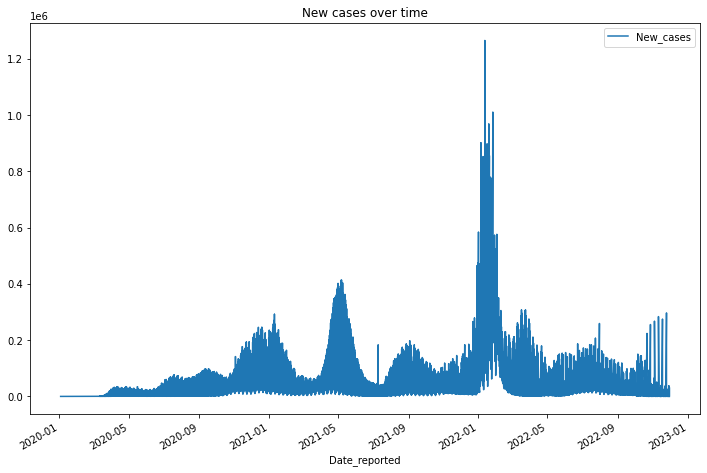

In [ ]:
# New cases ove time
fig, ax = plt.subplots(figsize = (12,8))
df.plot('Date_reported', 'New_cases', ax= ax  )
ax.set(title = "New cases over time")